In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/kaggle/input/twitter/train_tweet.csv')
df_test = pd.read_csv('/kaggle/input/twitter/test_tweets.csv')

In [4]:
df_train.shape,df_test.shape

((31962, 3), (17197, 2))

In [5]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
df_train.isna().sum()
df_test.isna().sum()

id       0
tweet    0
dtype: int64

## Check for positive and negative comments

In [8]:
df_train[df_train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [9]:
df_train[df_train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


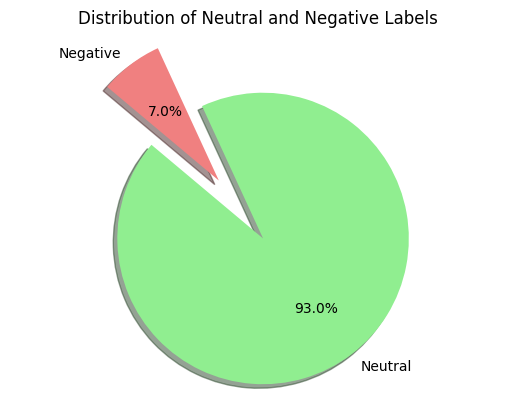

In [10]:
negative_count = df_train[df_train['label'] == 1].shape[0]
neutral_count = df_train[df_train['label'] == 0].shape[0]

labels = ['Neutral', 'Negative']
sizes = [neutral_count, negative_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.5, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Neutral and Negative Labels')
plt.show()

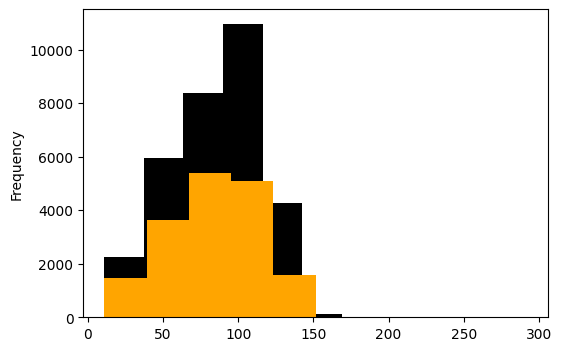

In [11]:
length_train = df_train['tweet'].str.len().plot.hist(color = 'black', figsize = (6, 4))
length_test = df_test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

#### Add length of tweet

In [12]:
df_train['len'] = df_train['tweet'].str.len()
df_test['len'] = df_test['tweet'].str.len()

print(df_train.head(10))
print('*'*150)
print(df_test.head(10))

   id  label                                              tweet  len
0   1      0   @user when a father is dysfunctional and is s...  102
1   2      0  @user @user thanks for #lyft credit i can't us...  122
2   3      0                                bihday your majesty   21
3   4      0  #model   i love u take with u all the time in ...   86
4   5      0             factsguide: society now    #motivation   39
5   6      0  [2/2] huge fan fare and big talking before the...  116
6   7      0   @user camping tomorrow @user @user @user @use...   74
7   8      0  the next school year is the year for exams.ð...  143
8   9      0  we won!!! love the land!!! #allin #cavs #champ...   87
9  10      0   @user @user welcome here !  i'm   it's so #gr...   50
******************************************************************************************************************************************************
      id                                              tweet  len
0  31963  #studiolife #ai

In [13]:
df_train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

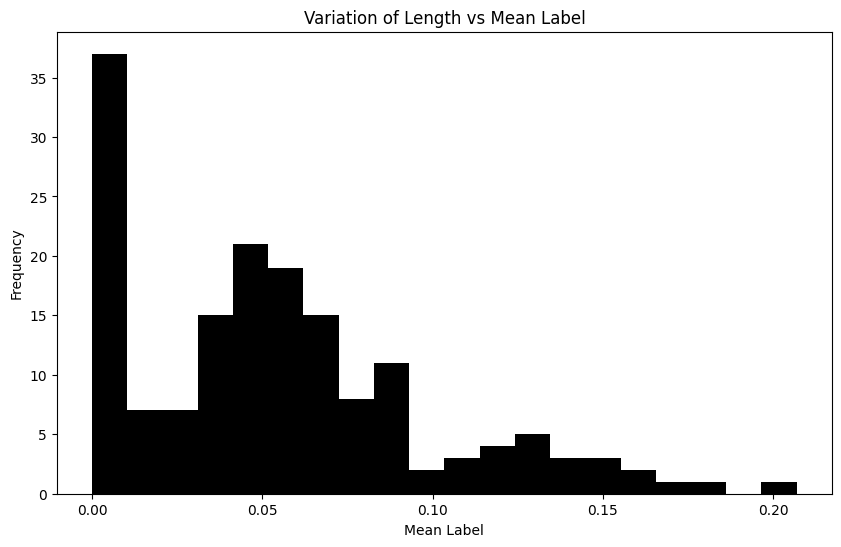

In [14]:
mean_label_by_length = df_train.groupby(df_train['tweet'].str.len())['label'].mean()
plt.figure(figsize=(10, 6))
plt.hist(mean_label_by_length, color='black', bins=20) 
plt.title('Variation of Length vs Mean Label')
plt.xlabel('Mean Label')
plt.ylabel('Frequency')
plt.show()

*   ###  using countvectorizer collect unique words and count of that word in each row

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

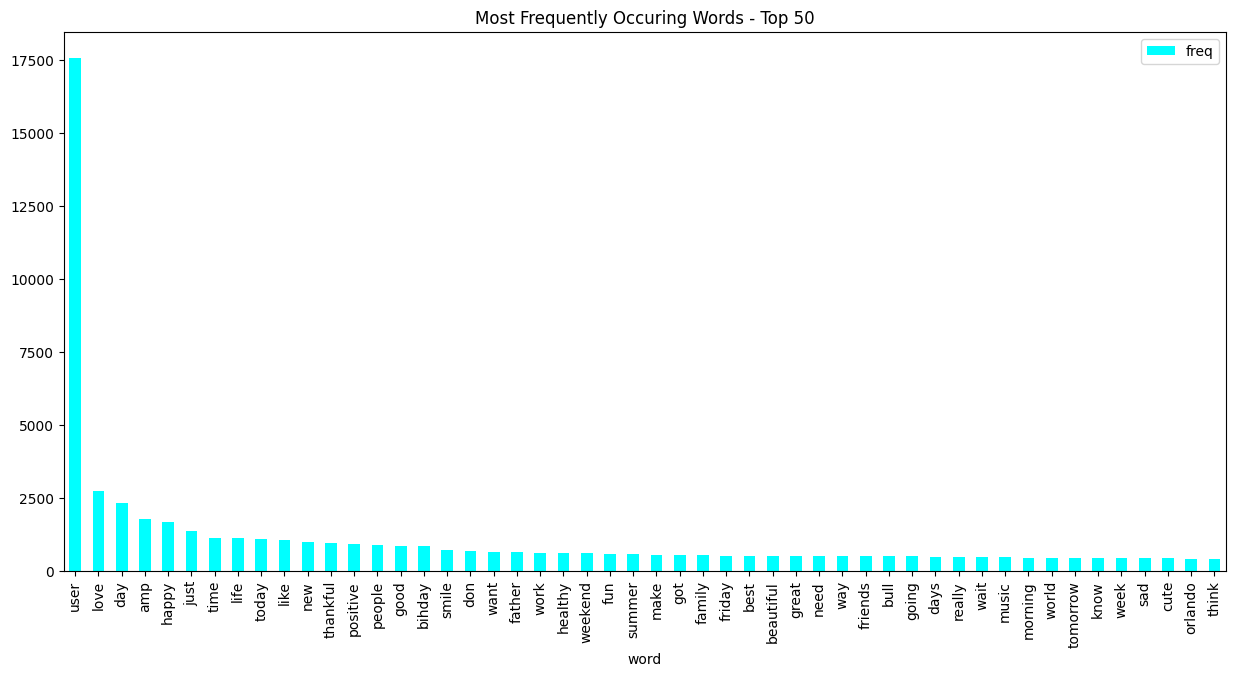

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')   # array of words not include is,and etc
words = cv.fit_transform(df_train.tweet)


# sum of each word count
sum_word = words.sum(axis=0)

# sort words according to frequency
words_freq = [(word, sum_word[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

freq = pd.DataFrame(words_freq, columns=['word', 'freq'])

freq.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'cyan')
plt.title("Most Frequently Occuring Words - Top 50")

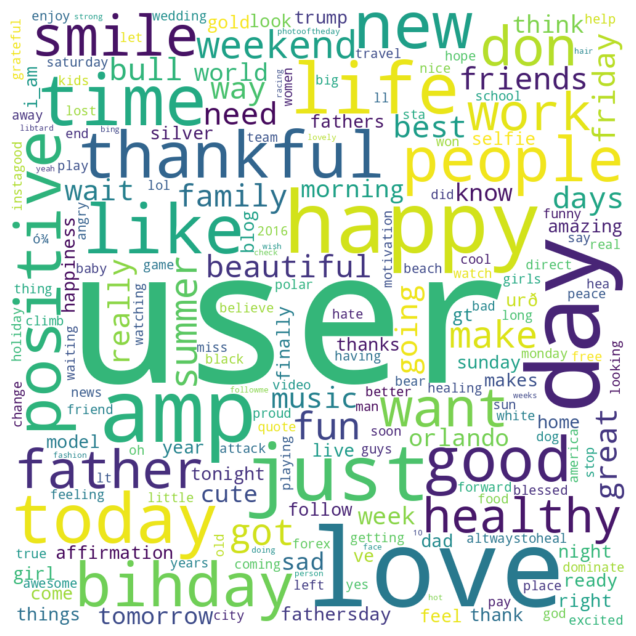

In [16]:
from wordcloud import WordCloud

word_freq_dict = dict(words_freq)

# Set the font family globally for the WordCloud library
plt.rcParams['font.family'] = 'Arial'

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Words

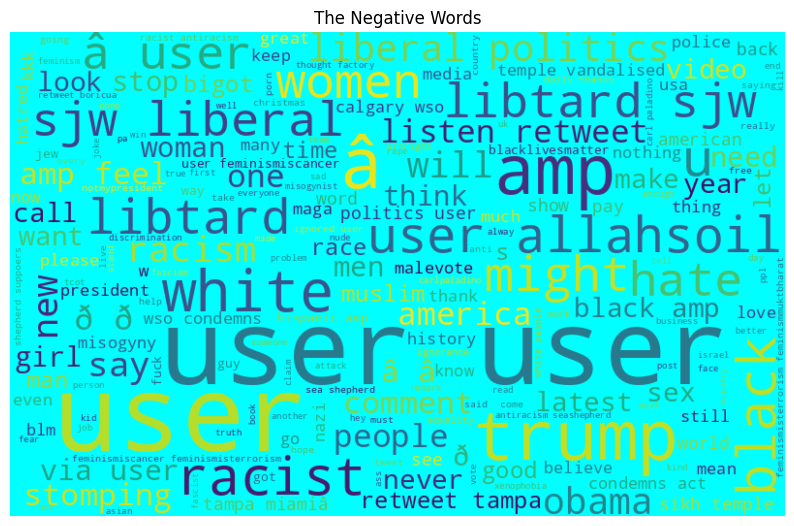

In [17]:
neg_words =' '.join([text for text in df_train['tweet'][df_train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

### Neutral Words

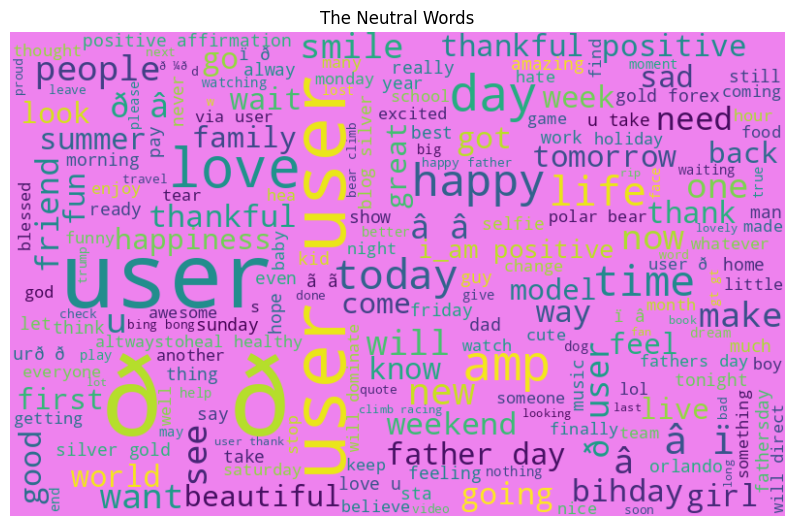

In [18]:
neutral_words =' '.join([text for text in df_train['tweet'][df_train['label'] == 0]])

wordcloud = WordCloud(background_color = 'violet', width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

* ***#: This matches the literal character "#" in the text.
(\w+): This is a capturing group denoted by the parentheses (). Within this group:
\w+: This matches one or more word characters. \w represents any alphanumeric character (equivalent to [a-zA-Z0-9_]), and + indicates that the preceding pattern (in this case, \w) should occur one or more times. So, \w+ will match one or more consecutive alphanumeric characters.***

In [19]:
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:

#### non-racist/sexist tweets
ht_neutral = hashtag_extract(df_train['tweet'][df_train['label']==0])

#### racist/sexist tweets
ht_negative = hashtag_extract(df_train['tweet'][df_train['label']==1])

### flatten the list
ht_neutral = sum(ht_neutral,[])
ht_negative = sum(ht_negative,[])

In [21]:
ht_neutral

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [22]:
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

#### count frequency of each flatten word

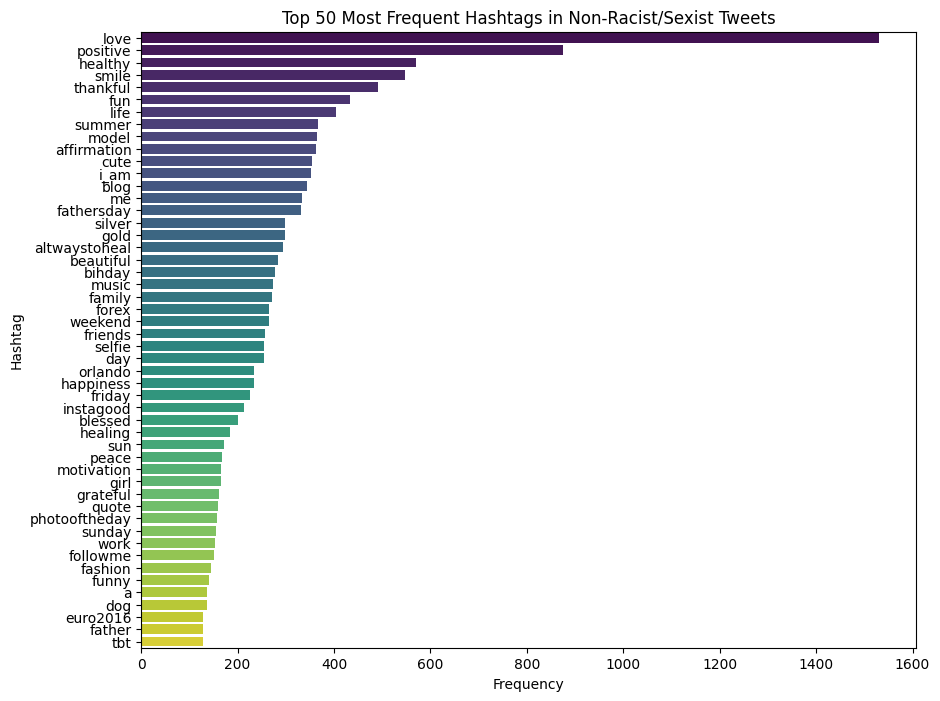

In [23]:
import nltk
from nltk.tokenize import word_tokenize
c = nltk.FreqDist(ht_neutral)
df = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})

df = df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10, 8))  
ax = sns.barplot(data=df.sort_values(by='Count', ascending=False), x="Count", y="Hashtag", palette="viridis")  
ax.set_xlabel('Frequency') 
ax.set_ylabel('Hashtag')   
ax.set_title('Top 50 Most Frequent Hashtags in Non-Racist/Sexist Tweets')  
plt.show()

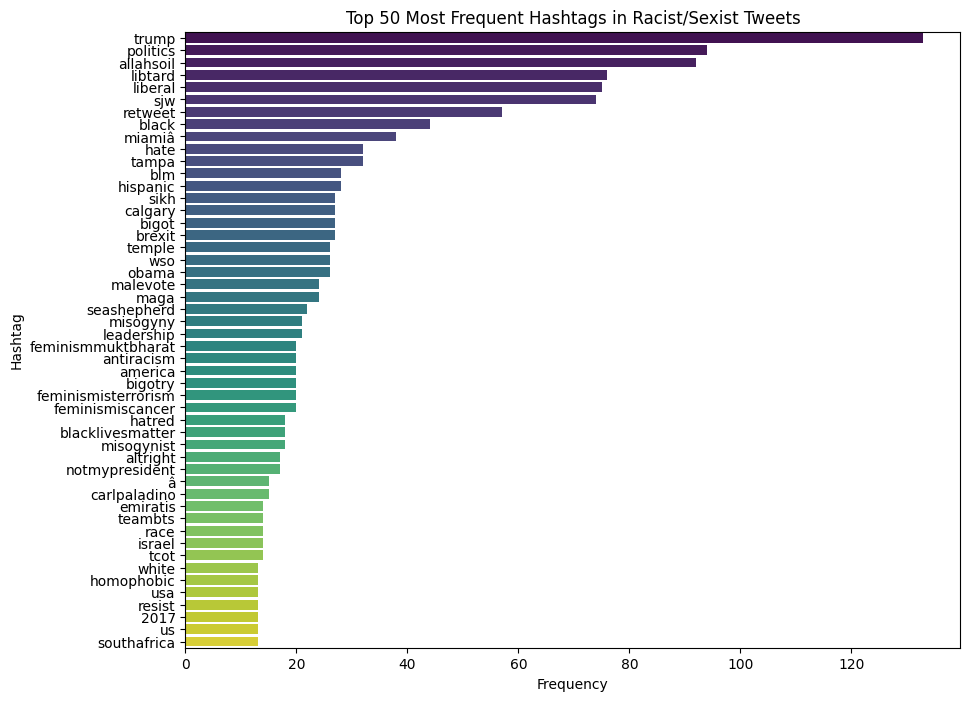

In [24]:
import nltk
from nltk.tokenize import word_tokenize
d = nltk.FreqDist(ht_negative)
df1 = pd.DataFrame({'Hashtag': list(d.keys()),
                  'Count': list(d.values())})

df1 = df1.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10, 8))  
ax = sns.barplot(data=df1.sort_values(by='Count', ascending=False), x="Count", y="Hashtag", palette="viridis")  
ax.set_xlabel('Frequency') 
ax.set_ylabel('Hashtag')   
ax.set_title('Top 50 Most Frequent Hashtags in Racist/Sexist Tweets')  
plt.show()

In [25]:
tok_tweet = df_train['tweet'].apply(lambda x: x.split()) 

In [26]:
import gensim

### word to vector model

wv = gensim.models.Word2Vec(
            tok_tweet,
            vector_size=200,  # Desired number of features/independent variables 
            window=5,         # Context window size
            min_count=2,
            sg=1,             # 1 for skip-gram model
            hs=0,
            negative=10,      # For negative sampling
            workers=2,        # Number of cores
            seed=34
)

In [27]:
wv.train(tok_tweet, total_examples= len(df_train['tweet']), epochs=20)


(6109148, 8411580)

In [28]:
wv.wv.most_similar(positive = "user")

[('error', 0.742957592010498),
 ('drafted', 0.7407655715942383),
 ('#morganfreeman', 0.7100662589073181),
 ("domino's", 0.6885279417037964),
 ('fb,', 0.6718575954437256),
 ('supreme', 0.6639884114265442),
 ('outraged', 0.663558304309845),
 ('toll', 0.6598131060600281),
 ('shipped', 0.6594875454902649),
 ('#cheap', 0.6584601402282715)]

In [29]:
wv.wv.most_similar(negative = "racist")

[('#greece', 0.08244141936302185),
 ('#family', 0.07673490047454834),
 ('#sunset', 0.07385412603616714),
 ('#adventure', 0.07177635282278061),
 ('#friendsâ\x80¦', 0.06728891283273697),
 ('#island', 0.0647415816783905),
 ('#quality', 0.0633145123720169),
 ('ð\x9f\x98\x8b', 0.062439028173685074),
 ('#food', 0.06190545856952667),
 ('ð\x9f\x98\x8a', 0.05830229073762894)]

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer   # removes common morphological and inflectional endings from words



In [31]:
train_corpus = []

for i in range(0, 31962):
    review = re.sub('[^a-zA-Z]', ' ', df_train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    train_corpus.append(review)
    

In [32]:
test_corpus = []

for i in range(0, 17197):
    review = re.sub('[^a-zA-Z]', ' ', df_test['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    test_corpus.append(review)
    

### for training

In [33]:
### creating a bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = df_train.iloc[:, 1]

In [34]:
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


### For testing

In [35]:
cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [37]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(25569, 2500)
(6393, 2500)
(25569,)
(6393,)


In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_valid)

print("Training Accuracy :", rf.score(x_train, y_train))
print("Validation Accuracy :", rf.score(x_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991004732293011
Validation Accuracy : 0.9551071484436102
F1 score : 0.6434782608695653
[[5847   90]
 [ 197  259]]


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_valid)

print("Training Accuracy :", lr.score(x_train, y_train))
print("Validation Accuracy :", lr.score(x_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9836911885486331
Validation Accuracy : 0.9435319881119975
F1 score : 0.6097297297297297
[[5750  187]
 [ 174  282]]


## DecisionTree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_valid)

print("Training Accuracy :", dt.score(x_train, y_train))
print("Validation Accuracy :", dt.score(x_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991004732293011
Validation Accuracy : 0.9332081964648835
F1 score : 0.5471898197242843
[[5708  229]
 [ 198  258]]


## GradientBoost

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_valid)

print("Training Accuracy :", xgb.score(x_train, y_train))
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608510305448004
Validation Accuracy : 0.9533865165024246
f1 score : 0.5655976676384838
[[5901   36]
 [ 262  194]]
